In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [15]:
otg_hits= pd.read_json('../data/phenotypes/otg_gpcr_gwas_hits.jsonl', lines=True)
print(otg_hits.trait_category.value_counts())
otg_hits_disease = otg_hits[otg_hits.trait_category.str.contains('disease') | otg_hits.trait_category.str.contains('disorder')]
otg_hits_disease = otg_hits_disease.groupby('input_symbol').aggregate({'trait_reported':set}).reset_index()


gpcrs = pd.read_csv('../data/gene_families/gpcr_genes_human_gpcrdb.tsv',sep='\t')
otg_hits_disease = gpcrs[['gene']].merge(otg_hits_disease,left_on='gene',right_on='input_symbol',how='left')
otg_hits_disease.to_csv('../data/phenotypes/otg_disease_traits_by_gene.tsv',sep='\t',index=False)

constraint = pd.read_csv('../data/constraint/zscores_hgnc_iuphar.tsv',sep='\t', index_col=0)

constraint['z_max'] = constraint[['z_lof','z_mis_pphen']].max(axis=1)

otg_hits_disease= pd.read_csv('../data/phenotypes/otg_disease_traits_by_gene.tsv',sep='\t')

otg_hits_disease['hit'] = ~otg_hits_disease.trait_reported.isnull()
constraint = constraint.merge(otg_hits_disease, left_on='hgnc_symbol',right_on='gene')#, how='left')
print(constraint.shape[0])
print(constraint.hit.sum())


measurement                                     3969
Uncategorised                                    252
cardiovascular disease                           123
phenotype                                        110
nervous system disease                            97
biological process                                93
pancreas disease                                  90
cell proliferation disorder                       69
gastrointestinal disease                          60
musculoskeletal or connective tissue disease      50
respiratory or thoracic disease                   32
endocrine system disease                          26
integumentary system disease                      17
disease of visual system                          16
urinary system disease                            10
reproductive system or breast disease              6
immune system disease                              6
pregnancy or perinatal disease                     5
injury, poisoning or other complication       

<AxesSubplot:xlabel='z_lof', ylabel='z_mis_pphen'>

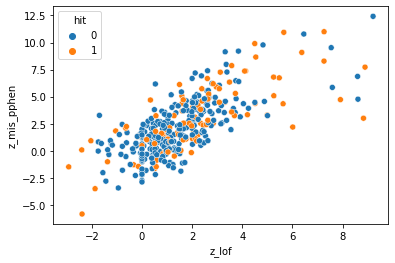

In [16]:
sns.scatterplot(x=constraint.z_lof.fillna(0), y=constraint.z_mis_pphen.fillna(0), hue=constraint.hit.fillna(0).astype(int))

In [20]:
constraint.sort_values('z_lof',ascending=False).head(50)[['hgnc_symbol','z_lof','trait_reported']]

,hgnc_symbol,z_lof,trait_reported
76,CELSR3,9.216540,NaN
75,CELSR2,8.895944,"{'Myocardial infarction (early onset)', 'Major..."
32,ADGRV1,8.834327,"{'Atopy', 'Opioid dependence x sex interaction..."
10,ADGRB3,8.614097,NaN
74,CELSR1,8.599436,NaN
29,ADGRL2,7.913936,"{'Cataracts', 'Pediatric autoimmune diseases',..."
8,ADGRB1,7.591161,NaN
28,ADGRL1,7.546423,NaN
9,ADGRB2,7.262407,{'Gastroesophageal reflux disease'}
30,ADGRL3,7.259701,{'Externalizing behaviour (multivariate analys...


In [17]:
constraint.sort_values('z_mis_pphen',ascending=False).head(50)[['hgnc_symbol','z_mis_pphen','trait_reported']]

,hgnc_symbol,z_mis_pphen,trait_reported
76,CELSR3,12.420319,NaN
9,ADGRB2,11.004342,{'Gastroesophageal reflux disease'}
218,GRM5,10.945452,{'Bipolar disorder or major depressive disorde...
126,GABBR1,10.788016,NaN
60,CASR,9.906491,"{'Urolithiasis', 'Type 2 diabetes', 'Kidney st..."
214,GRM1,9.781661,NaN
28,ADGRL1,9.530095,NaN
121,FZD5,9.211388,NaN
118,FZD2,9.147353,NaN
127,GABBR2,9.090334,{'Gynecologic disease (multivariate analysis) ...


In [16]:
constraint.sort_values('z_mis_pphen',ascending=False).tail(20)[['hgnc_symbol','z_mis_pphen','trait_reported']]

,hgnc_symbol,z_mis_pphen,trait_reported
301,OXER1,-1.471507,{'Hypertension'}
379,TAS2R7,-1.558014,NaN
145,GPR135,-1.615331,{'Externalizing behaviour (multivariate analys...
223,HCAR1,-1.634406,NaN
380,TAS2R8,-1.671554,NaN
100,DRD4,-1.782638,NaN
306,P2RY11,-1.797044,NaN
350,TAAR6,-1.870590,NaN
364,TAS2R20,-1.919527,NaN
349,TAAR5,-2.006639,NaN
